# Songs recommendation system :

In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

### loading of dataset:

In [ ]:
df  = pd.read_csv("Spotify most streamed.csv")

df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"


### Columns creating:

In [ ]:
#the column in songs dataset consists of artist-title data,so below code is for separating that data to diff columns
df.dropna(subset=['Artist and Title'], inplace=True)
df[['Artist', 'Title']] = df['Artist and Title'].str.split('-', 1, expand=True)
df.drop(columns=['Artist and Title'], inplace=True)
df

,Streams,Daily,Artist,Title
0,"3,783,983,806","1,736,378",The Weeknd,Blinding Lights
1,"3,616,649,759","1,135,140",Ed Sheeran,Shape of You
2,"2,958,875,491","1,522,093",Lewis Capaldi,Someone You Loved
3,"2,898,311,408","1,871,177",Post Malone,Sunflower
4,"2,896,024,418","666,818",Tones And I,Dance Monkey
...,...,...,...,...
2495,"399,549,516","250,073",Richard Marx,Right Here Waiting
2496,"399,218,096","617,797",The Neighbourhood,You Get Me So High
2497,"398,936,748","370,661",Clairo,Bubble Gum
2498,"398,725,594","1,250,615",Bing Crosby,White Christmas


#### Age column:

In [ ]:
age_groups = ['0-18', '19-30', '31-45', '46-60', '61+']

df['age_grp'] = np.random.choice(age_groups, size=len(df))

df.head()

,Streams,Daily,Artist,Title,Genre,Avg_Daily_Streams,Rate_of_Change,age_grp
0,3783983806,1736378.0,The Weeknd,Blinding Lights,Other,2179.239662,0.0,31-45
1,3616649759,1135140.0,Ed Sheeran,Shape of You,Other,3186.082562,0.0,31-45
2,2958875491,1522093.0,Lewis Capaldi,Someone You Loved,Other,1943.951842,0.0,61+
3,2898311408,1871177.0,Post Malone,Sunflower,Other,1548.924238,0.0,46-60
4,2896024418,666818.0,Tones And I,Dance Monkey,Other,4343.050754,0.0,0-18


#### Data Cleaning:

In [ ]:
print(df.isnull().sum())

Streams    0
Daily      3
Artist     0
Title      0
dtype: int64


In [ ]:
df['Daily'] = df['Daily'].str.replace(',', '').astype(float)
mean_daily = df['Daily'].mean()
df['Daily'].fillna(mean_daily, inplace=True)
print(df.isnull().sum())


Streams    0
Daily      0
Artist     0
Title      0
dtype: int64


#### Checking datatypes

In [ ]:

df['Streams'] = df['Streams'].str.replace(',', '').fillna(0).astype(np.int64)

print(df.dtypes)


Streams      int64
Daily      float64
Artist      object
Title       object
dtype: object


#### Unique values and analysis:

In [ ]:
unique_counts = df.nunique()
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
Streams    2496
Daily      2489
Artist      986
Title      2389
dtype: int64


In [ ]:
df.describe()

,Streams,Daily
count,2.500000e+03,2.500000e+03
mean,7.569890e+08,4.463696e+05
std,4.007388e+08,4.024802e+05
min,3.983103e+08,9.231000e+03
25%,4.847359e+08,2.192090e+05
50%,6.167420e+08,3.398710e+05
75%,8.882523e+08,5.589335e+05
max,3.783984e+09,9.215515e+06


In [ ]:
# Count the frequency of unique values OF ARTISTS :
artist_value_counts = df['Artist'].value_counts()
print("\nValue counts for the 'Artist' column:")
print(artist_value_counts)


Value counts for the 'Artist' column:
Taylor Swift        38
Bad Bunny           37
Drake               36
Billie Eilish       27
The Weeknd          25
                    ..
Los Legendarios      1
Tom Petty            1
Rise Against         1
No Doubt             1
Bing Crosby          1
Name: Artist, Length: 986, dtype: int64


#### Correlations of daily and streams:

In [ ]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_data.corr()
correlations

,Streams,Daily
Streams,1.000000,0.463862
Daily,0.463862,1.000000


## Feature Engineering:

##### Genre Extraction:

In [ ]:
def extract_genre(artist):
    if 'rock' in artist.lower():
        return 'Rock'
    elif 'pop' in artist.lower():
        return 'Pop'
    elif 'hip hop' in artist.lower():
        return 'Hip Hop'
    else:
        return 'Other'

# Create genre feature
df['Genre'] = df['Artist'].apply(extract_genre)
df

##### Popularity Trends:

In [ ]:
df['Avg_Daily_Streams'] = df['Streams'] / df['Daily']
# helps in telling consistent popularity of songs, regardless of their total number of streams.
df['Rate_of_Change'] = (df['Streams'] - df['Streams'].shift(30)) / df['Streams'].shift(30)
df['Rate_of_Change'].fillna(0, inplace=True)
# It reflects the recent trend in the popularity of songs and could help identify songs that are experiencing rapid growth or decline in popularity.
df

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

### Visualizations:

<Figure size 800x600 with 0 Axes>

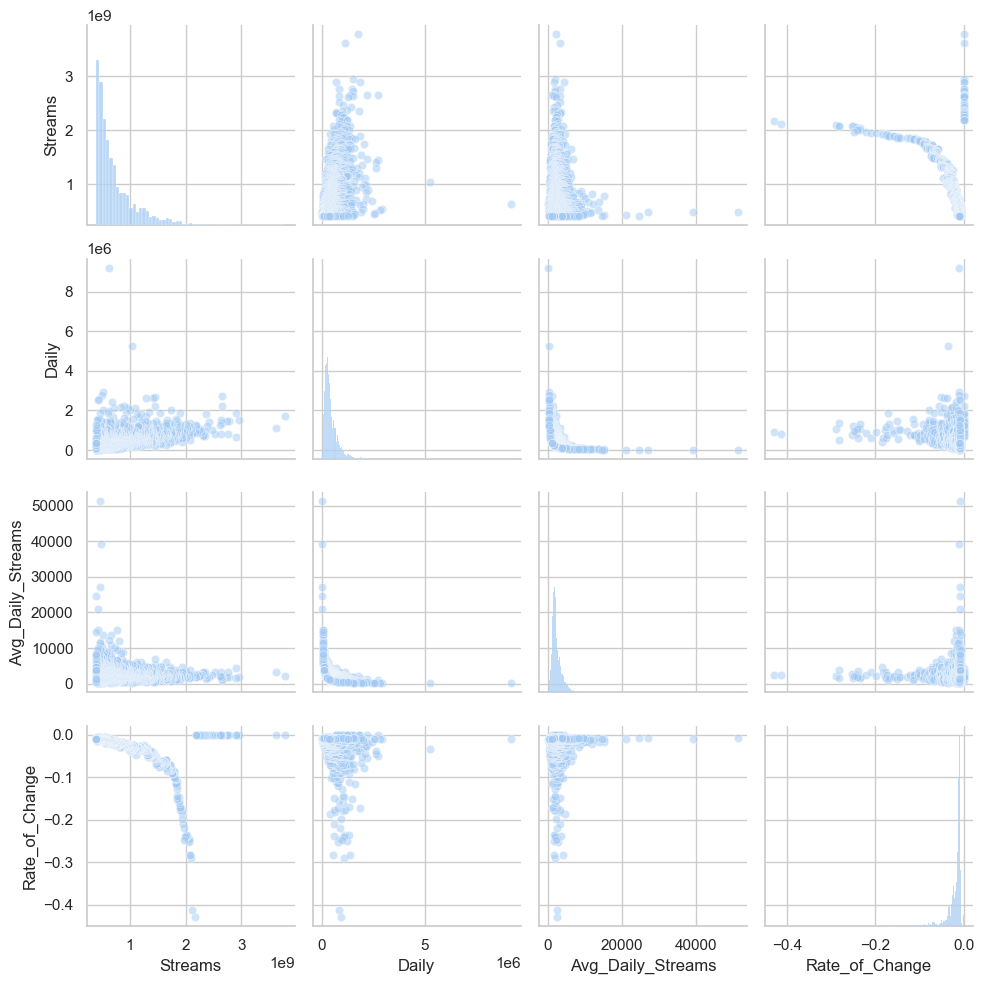

In [ ]:
pastel_palette = sns.color_palette("pastel")
sns.set(style="whitegrid", palette=pastel_palette)
plt.figure(figsize=(8, 6))
sns.pairplot(df, markers='o', plot_kws={'alpha': 0.5})
plt.tight_layout()
plt.show()

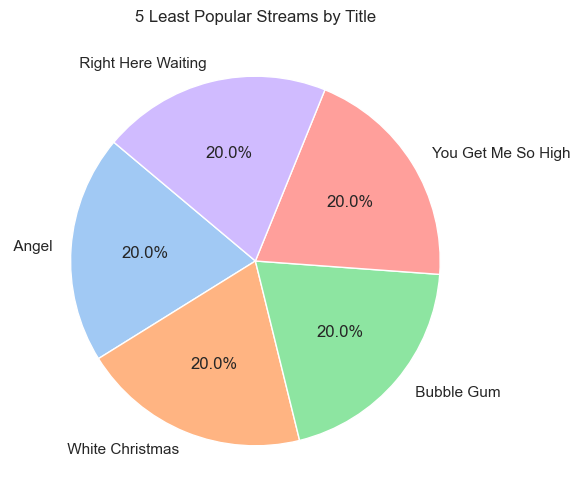

In [ ]:
least_popular = df.sort_values(by='Streams').head(5)
plt.figure(figsize=(6,6))
plt.pie(least_popular['Streams'], labels=least_popular['Title'], autopct='%1.1f%%', startangle=140)
plt.title('5 Least Popular Streams by Title')
plt.show()

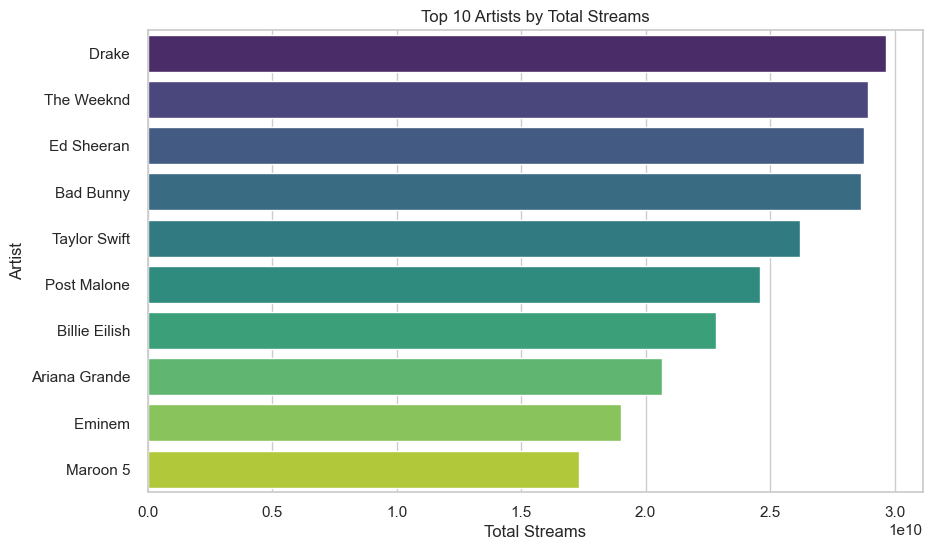

In [ ]:
plt.figure(figsize=(10, 6))
top_artists = df.groupby('Artist')['Streams'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()

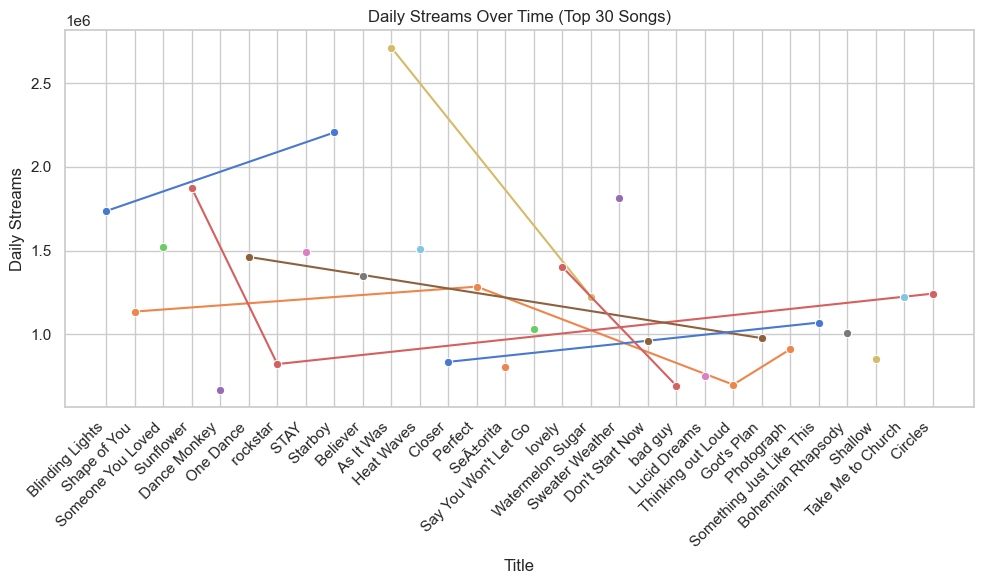

In [ ]:
top_30_df = df.sort_values(by='Streams', ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Title', y='Daily', data=top_30_df, hue='Artist', palette='muted', marker='o', legend=False)
plt.title('Daily Streams Over Time (Top 30 Songs)')
plt.xlabel('Title')
plt.ylabel('Daily Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


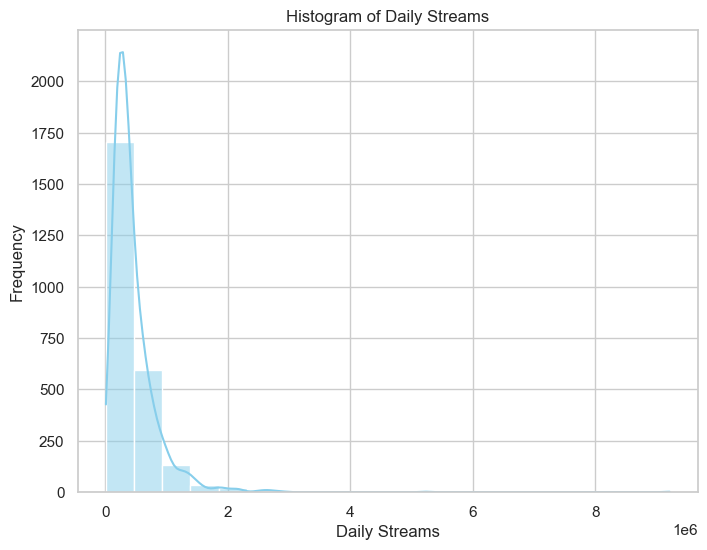

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Daily Streams')
plt.xlabel('Daily Streams')
plt.ylabel('Frequency')
plt.show()


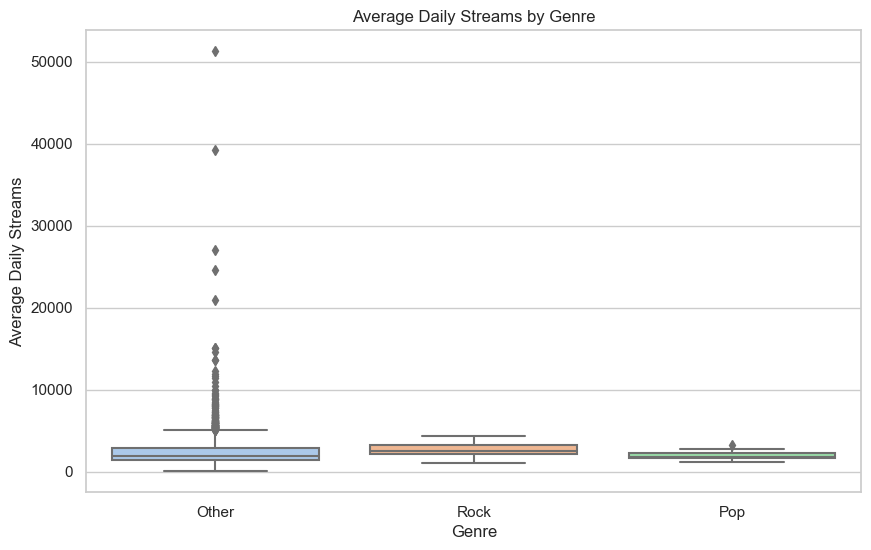

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Avg_Daily_Streams', data=df, palette='pastel')
plt.title('Average Daily Streams by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Daily Streams')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Title', y='Rate_of_Change', data=df, hue='Artist', palette='muted', marker='o')
plt.title('Rate of Change Over Time')
plt.xlabel('Title')
plt.ylabel('Rate of Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyboardInterrupt



# Building Recommendation Model:


In [ ]:
Collaborative Filtering (Using Surprise library):